# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/home/udacity/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/udacity/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

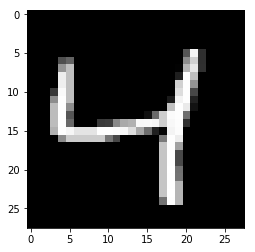

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name = 'inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name = 'targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation = tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded =tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6942
Epoch: 1/20... Training loss: 0.6909
Epoch: 1/20... Training loss: 0.6877
Epoch: 1/20... Training loss: 0.6843
Epoch: 1/20... Training loss: 0.6799
Epoch: 1/20... Training loss: 0.6748
Epoch: 1/20... Training loss: 0.6687
Epoch: 1/20... Training loss: 0.6601
Epoch: 1/20... Training loss: 0.6516
Epoch: 1/20... Training loss: 0.6403
Epoch: 1/20... Training loss: 0.6284
Epoch: 1/20... Training loss: 0.6180
Epoch: 1/20... Training loss: 0.6030
Epoch: 1/20... Training loss: 0.5868
Epoch: 1/20... Training loss: 0.5678
Epoch: 1/20... Training loss: 0.5521
Epoch: 1/20... Training loss: 0.5351
Epoch: 1/20... Training loss: 0.5178
Epoch: 1/20... Training loss: 0.5018
Epoch: 1/20... Training loss: 0.4815
Epoch: 1/20... Training loss: 0.4591
Epoch: 1/20... Training loss: 0.4463
Epoch: 1/20... Training loss: 0.4249
Epoch: 1/20... Training loss: 0.4086
Epoch: 1/20... Training loss: 0.3967
Epoch: 1/20... Training loss: 0.3832
Epoch: 1/20... Training loss: 0.3689
E

Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1975
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1858
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1974
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1984
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1850
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1858
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1846
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1979
Epoch: 1/20... Training loss: 0.1901
E

Epoch: 2/20... Training loss: 0.1664
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1617
Epoch: 2/20... Training loss: 0.1620
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1656
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1623
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1588
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1594
Epoch: 2/20... Training loss: 0.1642
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1621
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1607
E

Epoch: 3/20... Training loss: 0.1439
Epoch: 3/20... Training loss: 0.1431
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1460
Epoch: 3/20... Training loss: 0.1440
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1426
Epoch: 3/20... Training loss: 0.1414
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1437
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1422
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1426
Epoch: 3/20... Training loss: 0.1424
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1432
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1445
E

Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1214
E

Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1166
Epoch: 5/20... Training loss: 0.1184
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1168
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1186
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1172
Epoch: 5/20... Training loss: 0.1137
E

Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1130
E

Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.0999
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1014
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1066
E

Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0968
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0962
Epoch: 7/20... Training loss: 0.0965
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1035
E

Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.1029
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1046
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.1049
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0982
E

Epoch: 9/20... Training loss: 0.1018
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0979
E

Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.1004
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.1001
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0882
Epoch: 12/20... Training loss: 0.0902
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0985
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0884
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0981
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0872
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0984
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0895
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0895
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0896
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0980
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0970
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0885
Epoch: 19/20... Training loss: 0.0893
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0975
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0971
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

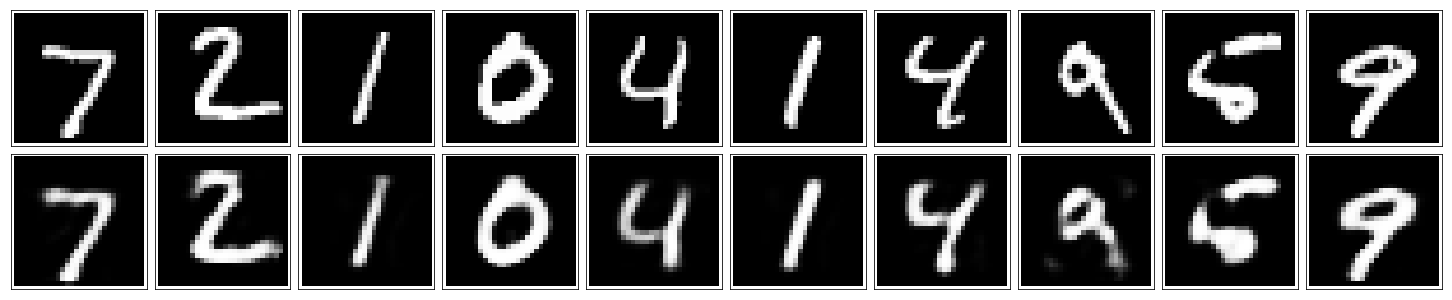

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.